# Future Work:

I was very interested to see if income would play a major role in restaurants passing or failing
inspection. Here is a subset of my data (everything previously staying the same up to this point).
After importing the uszipcode library, I searched for the specific zip codes in my data base across
median household incomes. Then created a new column called 'income' with this information.
The heat map displays the new feature distributions with the added feature. This will be good info
for future work on this topic.


In [41]:
from uszipcode import SearchEngine
import geopandas as gpd
import math

In [42]:
search = SearchEngine(simple_zipcode=False)

In [43]:
def getincome(_lat,_lon):
  try:
    income = search.by_coordinates(_lat,_lon, radius=2,returns=1)[0]
    return income.median_household_income
  except:
    return 0 

In [44]:
data['income'] = data.apply(lambda row:  getincome(row['Latitude'], row['Longitude']) ,axis=1)

In [45]:
data.head()

,Risk,Zip,Inspection Type,Results,Latitude,Longitude,income
0,3,60613.0,License Re-Inspection,0,41.947118,-87.655381,66697
1,3,60666.0,Canvass,1,42.008536,-87.914428,54688
2,3,60629.0,License,0,41.779190,-87.695892,40650
3,3,60618.0,License,0,41.939168,-87.712546,55577
4,3,60641.0,Canvass,1,41.946065,-87.760722,46816


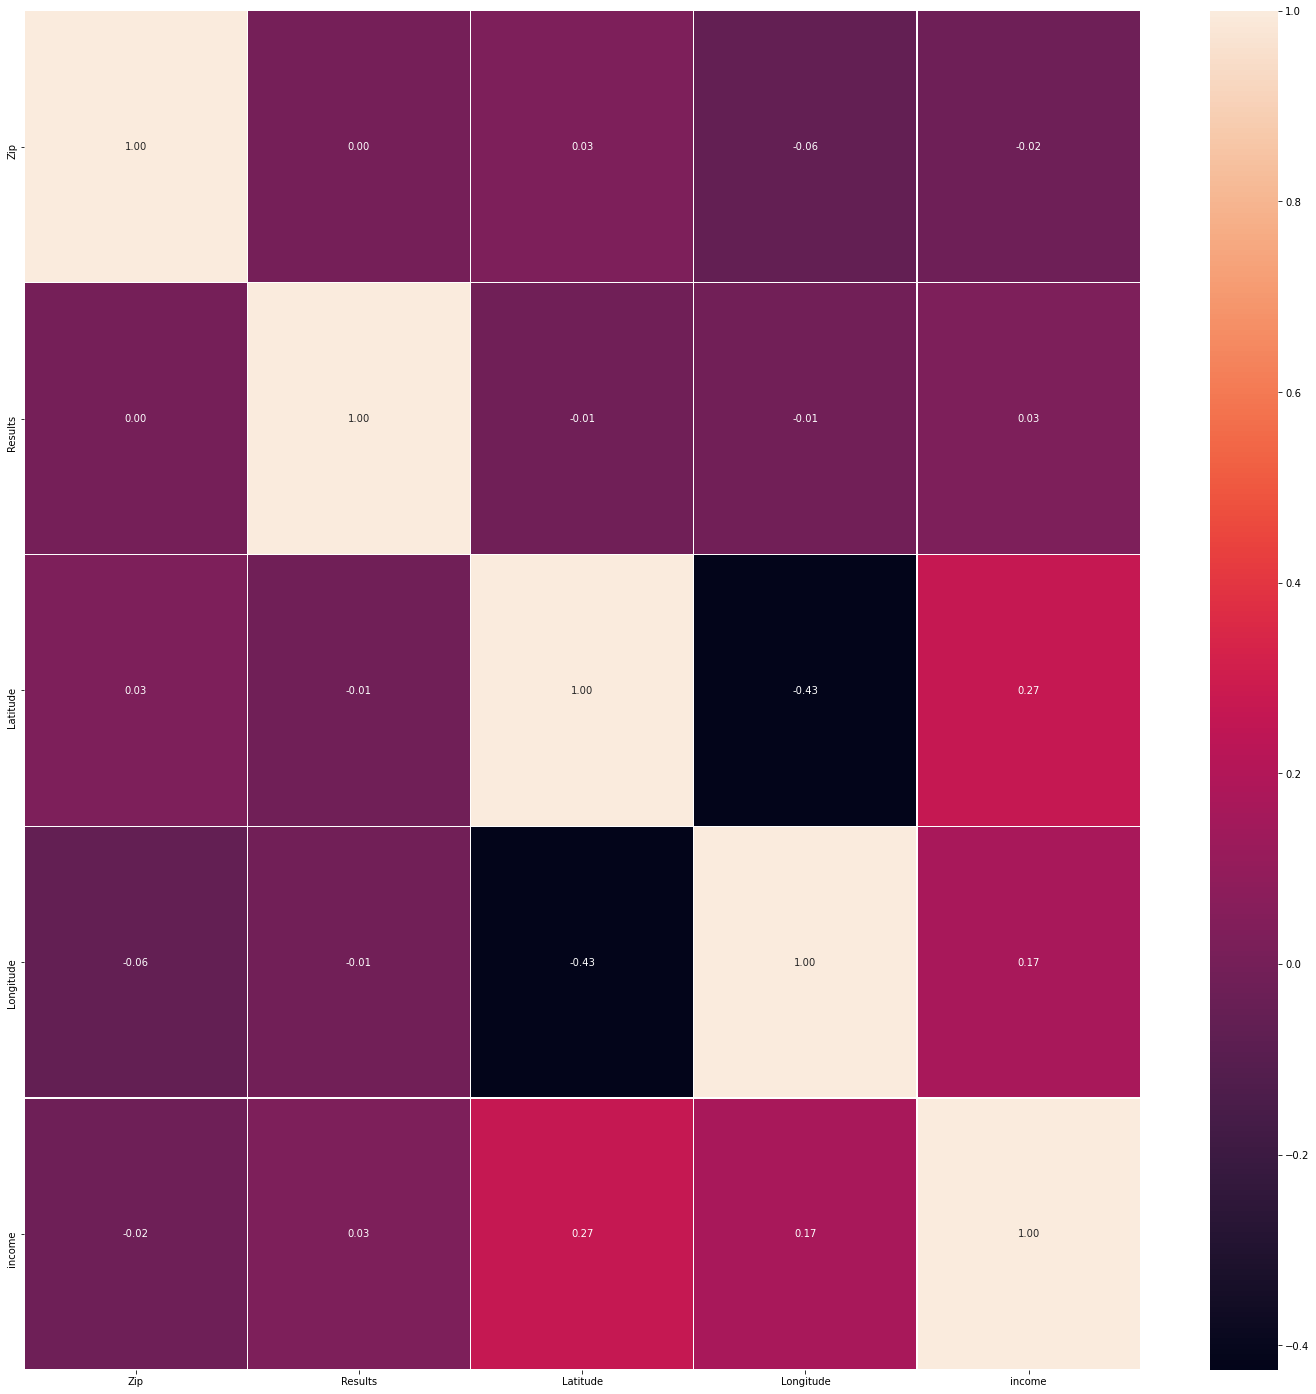

In [46]:
plt.figure(figsize = (25,25))
sns.heatmap(data = data.corr(), annot=True, linewidths=.3, fmt="1.2f")
plt.show()

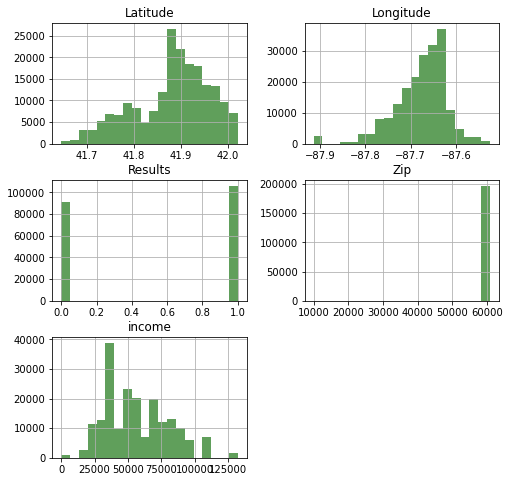

In [47]:
data.hist(figsize=(8,8),bins=20,color="#107009AA")
plt.show()

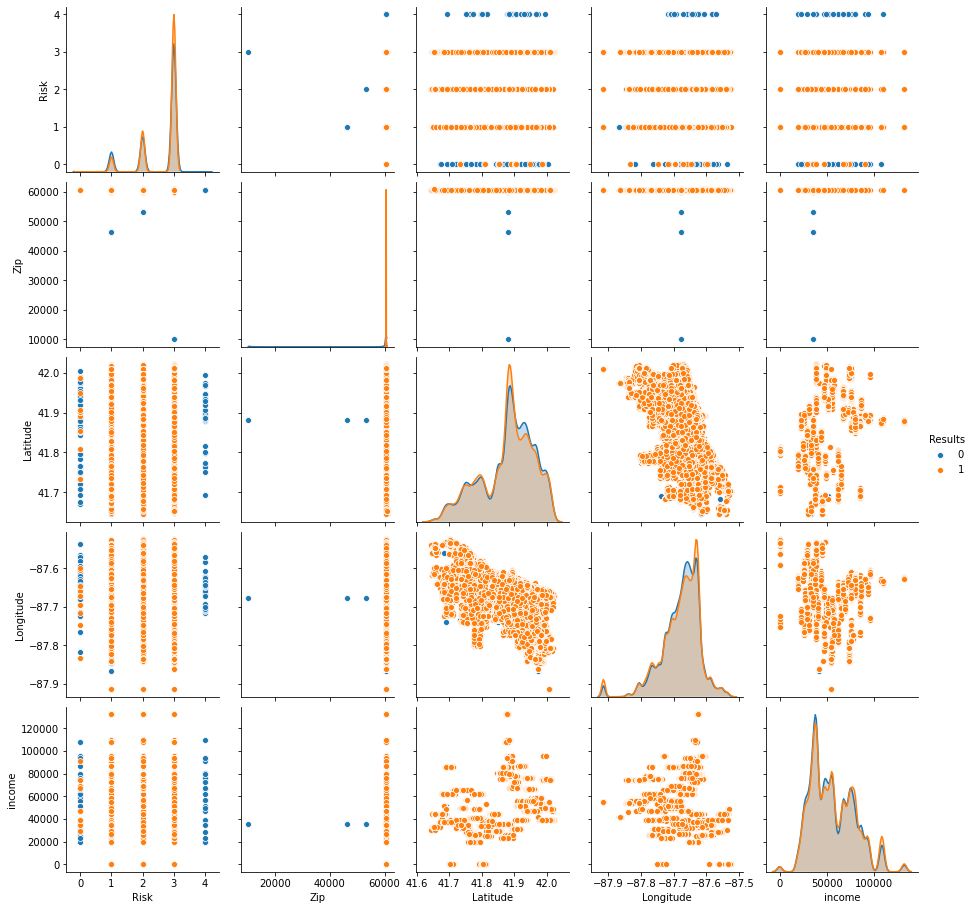

In [48]:
sns.pairplot(data,hue='Results')